# Prédictions de la consommation totale d’énergie de bâtiments non destinés à l’habitation

## SOMMAIRE

## 1. Chargement des données

- Importation des librairies

- Retrait de "ENERGY STAR Score" du dataset 

## 2. Prédictions des modèles sans " ENERGYSTARScore "

### 2.1. Modèles linéaires

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

- Tableau récapitulatif des modèles linéaires

### 2.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

- <span style="color: blue;">Random Forest Regressor</span> 

- <span style="color: blue;">Gradient boosting</span> 

- Tableau récapitulatif des modèles non-linéaires

### 2.3. Tableau récapitulatif de l'ensemble des modèles

### 2.4. Feature importance sans "ENERGYSTARScore"

- Feature importance globale

- Feature importance locale

## 3. Prédictions des modèles avec " ENERGYSTARScore "

- Réintroduction de de la variable "ENERGYSTARScore" dans le dataset

- Créer un sous-ensemble du dataset avec les bâtiments ayant une valeur de l’EnergyStarScore non nulle

### 3.1. Modèles linéaires

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Tableau récapitulatif des modèles linéaires

### 3.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

- <span style="color: blue;">Random Forest Regressor</span> 

- <span style="color: blue;">Gradient boosting</span> 

- Tableau récapitulatif des modèles non-linéaires

### 3.3. Tableau récapitulatif de l'ensemble des modèles

### 3.4. Feature importance sans "ENERGYSTARScore"

- Feature importance globale

- Feature importance locale

## 4. Conclusion

### 1. Chargement des données

- Importation des librairies

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model

from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import model_selection
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
import timeit
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import shap

%matplotlib inline

In [2]:
# Chargement des données
building_df_cleaned = pd.read_csv('./data/building_df_retained.csv', low_memory = False)
building_df_cleaned

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded
0,47.61220,-122.33799,12,88434,60.0,84.300003,2.83,89,1,1.00,0.00,1,2,6,13,0,8
1,47.61317,-122.33393,11,103566,61.0,97.900002,2.86,20,3,0.85,0.15,1,2,6,13,0,2
2,47.61393,-122.33810,41,956110,43.0,97.699997,2.19,47,1,0.79,0.21,1,2,6,13,0,4
3,47.61412,-122.33664,10,61320,56.0,113.300003,4.67,90,1,1.00,0.00,1,2,6,13,0,9
4,47.61375,-122.34047,18,175580,75.0,118.699997,2.88,36,3,0.65,0.35,1,2,6,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,46.0,76.699997,1.70,26,1,1.00,0.00,2,9,9,24,0,2
1647,47.59625,-122.32283,1,16000,NaN,65.900002,2.01,12,1,1.00,0.00,2,10,6,31,0,1
1648,47.63644,-122.35784,1,13157,NaN,460.100006,16.99,42,3,1.00,0.00,2,10,11,31,0,4
1649,47.52832,-122.32431,1,14101,NaN,55.500000,1.57,27,5,1.00,0.00,2,8,9,31,0,2


- Retrait de "ENERGY STAR Score" du dataset 

In [3]:
# Le dataset sans la variable "ENERGY STAR Score"
columns = ['Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'TotalUseTypeNumber', 'GFABuildingRate', 
           'GFAParkingRate', 'BuildingType_encoded', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded', 'LargestPropertyUseType_encoded', 
           'ComplianceStatus_encoded','BuildingAge_Group_encoded', 'GHGEmissionsIntensity', 'SiteEUIWN(kBtu/sf)']
df_without_score = building_df_cleaned[columns]
df_without_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,2.83,84.300003
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,2.86,97.900002
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,2.19,97.699997
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,4.67,113.300003
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,2.88,118.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,26,1,1.00,0.00,2,9,9,24,0,2,1.70,76.699997
1647,47.59625,-122.32283,1,16000,12,1,1.00,0.00,2,10,6,31,0,1,2.01,65.900002
1648,47.63644,-122.35784,1,13157,42,3,1.00,0.00,2,10,11,31,0,4,16.99,460.100006
1649,47.52832,-122.32431,1,14101,27,5,1.00,0.00,2,8,9,31,0,2,1.57,55.500000


In [4]:
df_without_score.shape

(1651, 16)

## 2. Prédictions des modèles sans " ENERGYSTARScore "

### 2.1. Modèles linéaires

In [11]:
#X = building_df_cleaned.iloc[:,1:-2]
#y = building_df_cleaned.iloc[:,-1]

In [30]:
# Créer des objets X et y qui séparent les variables d'entrée (X) de la variable cible (y) dans le cadre de la modélisation prédictive.
X = df_without_score.drop(columns = 'SiteEUIWN(kBtu/sf)')
y = df_without_score['SiteEUIWN(kBtu/sf)']

In [31]:
# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)
#X_test_std = std_scale.transform(X_test)

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y ,test_size=0.3)

On sépare ensuite le jeu de données en données d'entraînement et données test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.3, random_state = 42)

In [28]:
X_train.shape

(1155, 15)

In [9]:
X_test.shape

(496, 15)

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

Meilleurs paramètres : {'quantile': 0.25, 'strategy': 'mean'}
RMSE : 78.89999564974696
R2 : -0.0011699855453595198
MAE : 44.54660688337531


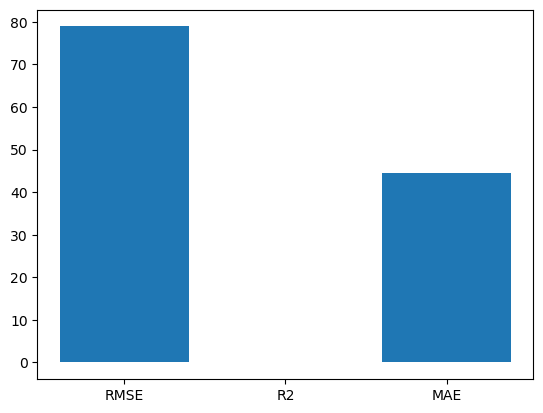

In [9]:
# Définition des paramètres à tester
param_grid = {'strategy': ['mean', 'median', 'quantile'], 'quantile': [0.25, 0.5, 0.75]}

# Création du modèle
dummy = DummyRegressor()

# Validation croisée
grid_search = GridSearchCV(dummy, param_grid=param_grid, cv=5, scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], refit='r2')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation avec les meilleurs paramètres
best_dummy = grid_search.best_estimator_
y_pred = best_dummy.predict(X_test)

# Calcul de la RMSE, du R2 et du MAE sur l'ensemble de validation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

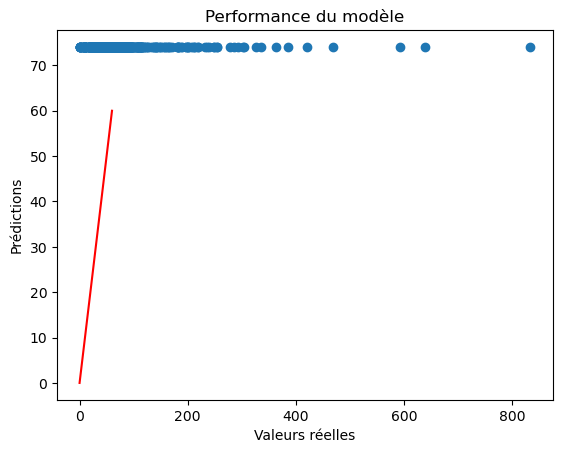

In [10]:
plt.scatter(y_test, y_pred)
plt.plot([0, 60], [0, 60], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

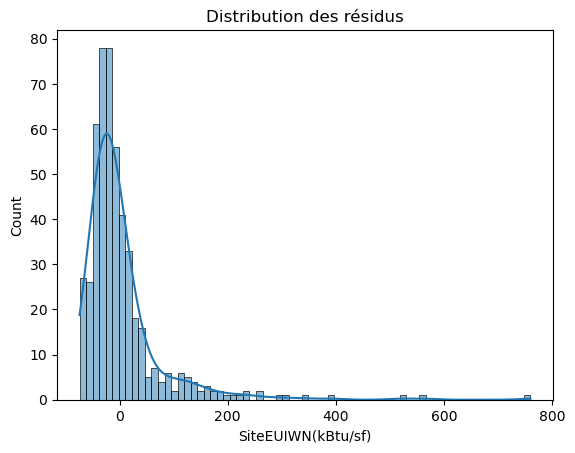

In [11]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

Meilleurs paramètres : {'alpha': 100}
RMSE : 53.88082746540335
R2 : 0.533101610246186
MAE : 25.998061634230364


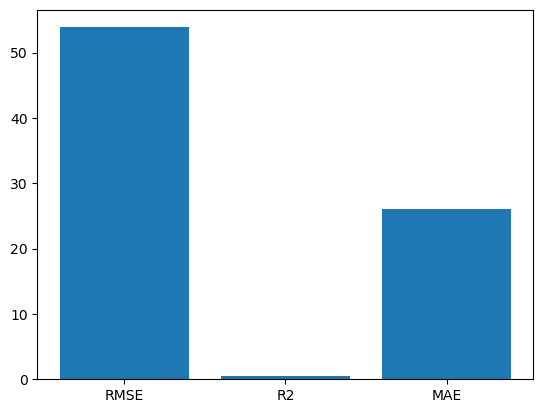

In [12]:
# Création du modèle Ridge
ridge_model = Ridge()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

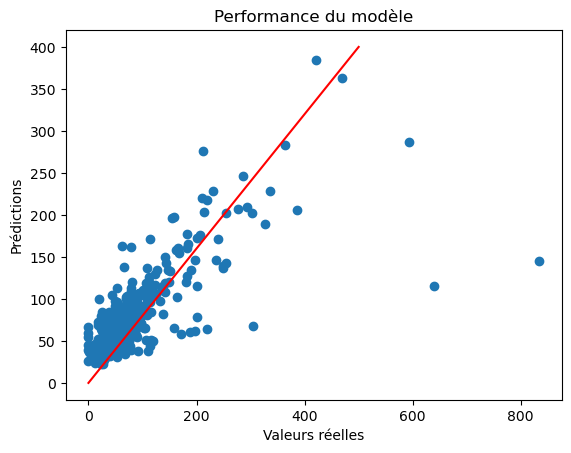

In [13]:
plt.scatter(y_test, y_pred)
plt.plot([0, 500], [0, 400], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

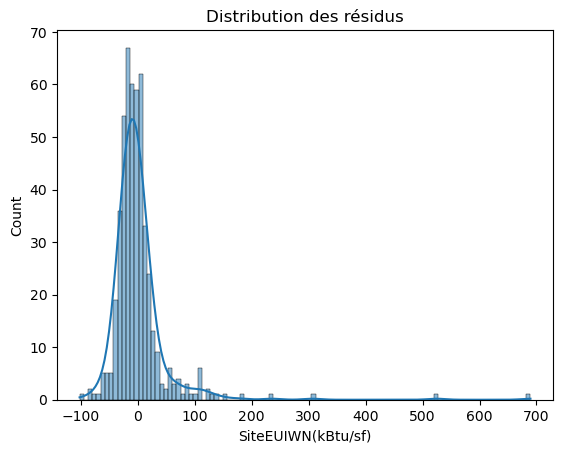

In [14]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

Meilleurs paramètres : {'alpha': 1}
Meilleurs paramètres : {'alpha': 1}
RMSE : 52.907980952135084
R2 : 0.5498095896016184
MAE : 25.27628879848579


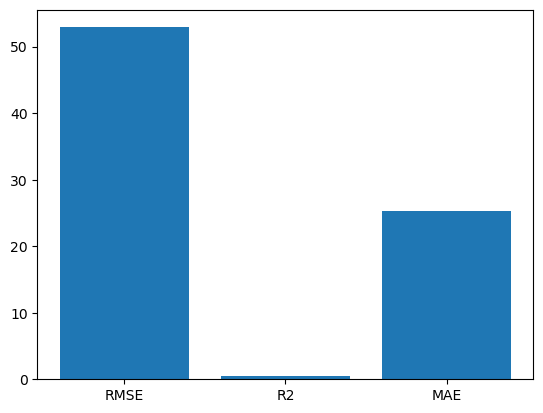

In [33]:
# Création du modèle Lasso
lasso_model = Lasso()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print('Meilleurs paramètres :', grid_search.best_params_)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

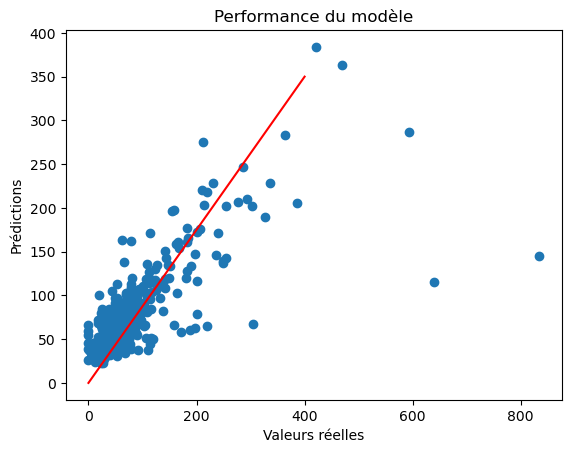

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([0, 400], [0, 350], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

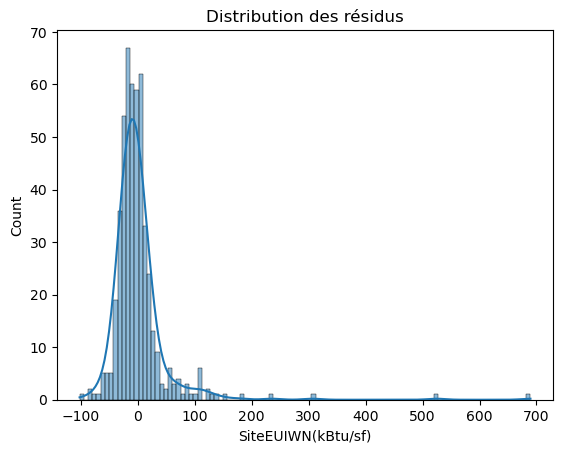

In [19]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- <b>Tableau récapitulatif des modèles linéaires</b> 

Testing Ridge...
RMSE: 48.73
R2: 0.52
MAE: 26.25

Testing Lasso...
RMSE: 50.79
R2: 0.49
MAE: 29.04

Testing Dummy...
RMSE: 74.46
R2: -0.09
MAE: 41.81

            RMSE        R2        MAE
Ridge  48.729016  0.517202  26.253256
Lasso  50.786272  0.491149  29.040602
Dummy  74.463181 -0.089032  41.811898


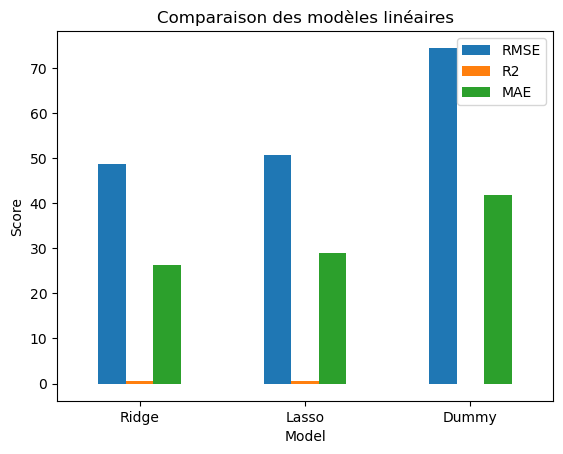

In [33]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    
    clf.fit(X_train, y_train)
    results[model[0]] = {
        "RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
        "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
        "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]
    }
    
    # Affichage des résultats
    print(f"RMSE: {results[model[0]]['RMSE']:.2f}")
    print(f"R2: {results[model[0]]['R2']:.2f}")
    print(f"MAE: {results[model[0]]['MAE']:.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")

# Affichage du tableau de résultats
print(df_results)

# Affichage graphique des résultats
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles linéaires")
plt.savefig('M_lineaires.png')
plt.show()

Nous constatons avec les modèles linéaires que les modèles <span style="color: blue;">modèle Ridge</span> et <span style="color: blue;">modèle Lasso</span> améliorent la performance de notre modèle simple le <span style="color: blue;">Dummy Regressor</span> 

### 2.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

In [29]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)      

RMSE: 49.31
MAE: 23.11
R2: 0.60


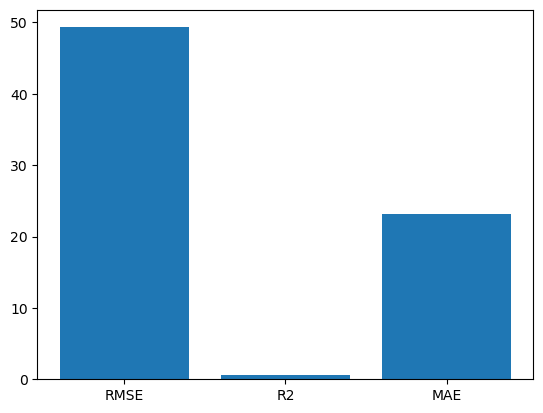

In [30]:
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer les métriques sur le jeu de test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# afficher les métriques
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R2: {:.2f}".format(r2))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

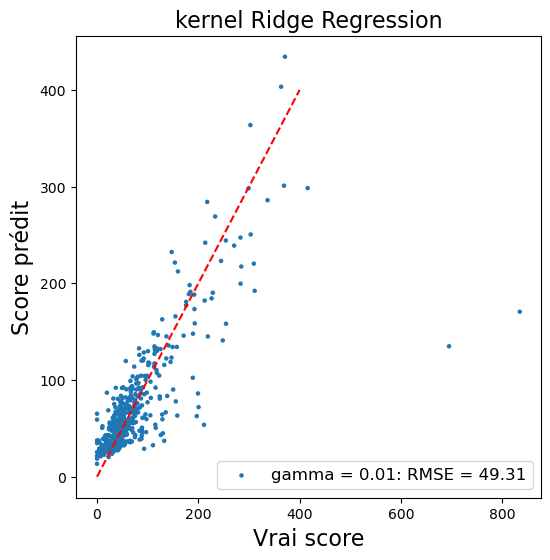

In [32]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 5
    else:
        sizes[(yt, yp)] = 5     
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

plt.plot([0, 400], [0, 400], "--", color="red")

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
#plt.xlim([2.9, 9.1])
#plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

- <span style="color: blue;">Random Forest Regressor</span> 

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestRegressor(min_samples_leaf=2, n_estimators=150)
RMSE: 39.01 
R2: 0.67 
MAE: 21.32 
Time: 262.81s


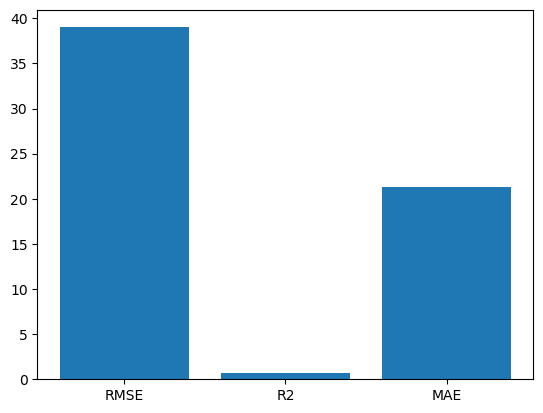

In [9]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle
rf = RandomForestRegressor()

start_time = timeit.default_timer()

# Faire une recherche de grille pour trouver les meilleurs hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calculer la RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer la R2
r2 = r2_score(y_test, y_pred)

# Calculer la MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: {:.2f} \nR2: {:.2f} \nMAE: {:.2f} \nTime: {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

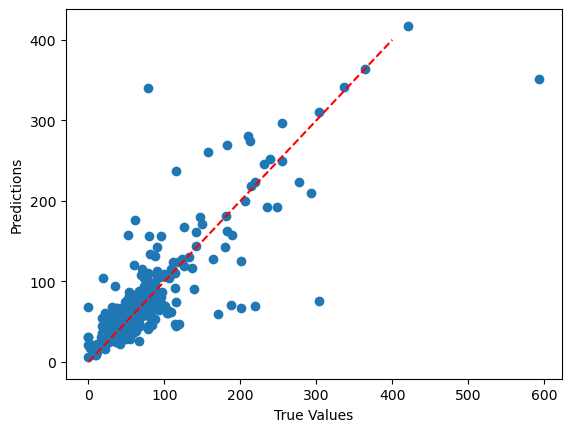

In [22]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.scatter(y_test, y_pred)
plt.plot([0, 400], [0, 400], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <span style="color: blue;">Gradient boosting</span> 

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score :  2203.3912487851107
RMSE 42.95, R2 0.60, MAE 22.56, time 172.09s


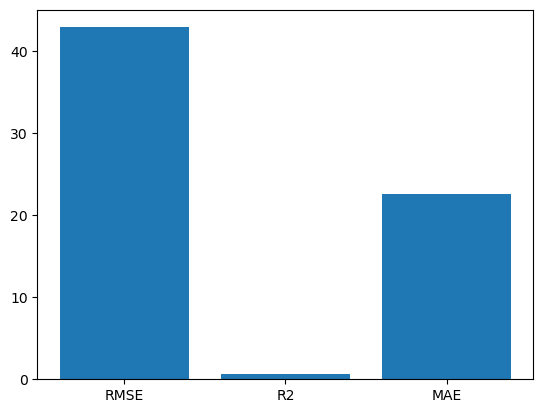

In [20]:
# Définition des paramètres à tester
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Instanciation du modèle
gb_reg = GradientBoostingRegressor()

start_time = timeit.default_timer()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(gb_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

# Entraînement du modèle avec les meilleurs paramètres
best_gb_reg = GradientBoostingRegressor(**grid_search.best_params_)
best_gb_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = best_gb_reg.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calcul des métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE {:.2f}, R2 {:.2f}, MAE {:.2f}, time {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

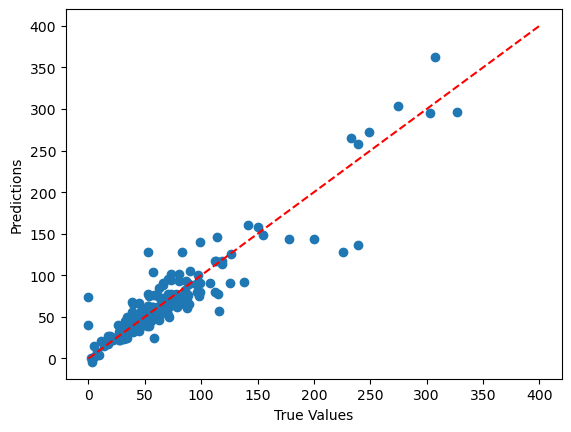

In [65]:
# Tracer la courbe des vraies valeurs et des prédictions
plt.scatter(y_test, y_pred)
plt.plot([0, 400], [0, 400], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <b>Tableau récapitulatif des modèles non-linéaires</b> 

Testing Random Forest...
Random Forest RMSE: 51.44
Random Forest R2: 0.57
Random Forest MAE: 23.22

Testing Gradient Boosting...
Gradient Boosting RMSE: 64.37
Gradient Boosting R2: 0.33
Gradient Boosting MAE: 34.32

Testing Kernel Ridge...
Kernel Ridge RMSE: 92.62
Kernel Ridge R2: -0.38
Kernel Ridge MAE: 76.12

                         RMSE          R2         MAE
Model                                                
Random Forest       44.969851    0.599478   23.446908
Gradient Boosting   56.780753    0.372330   35.139185
Kernel Ridge       799.191036 -593.601427  134.226683


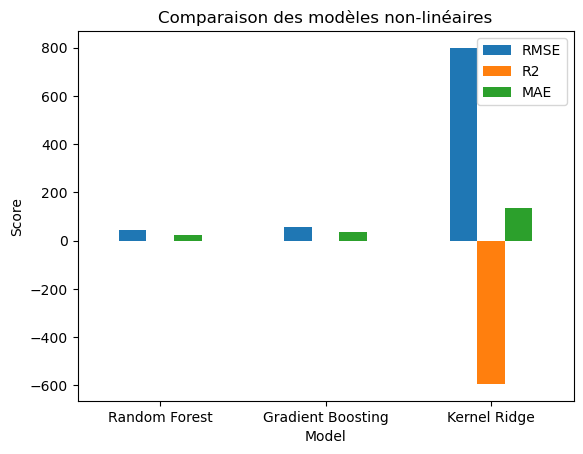

In [34]:
# Liste des modèles à tester
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False), 
           "R2": make_scorer(r2_score),
           "MAE": make_scorer(mean_absolute_error)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]}
    
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)

    # Affichage des résultats sur les données de test
    print(f"{model[0]} RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"{model[0]} R2: {r2_score(y_test, y_pred):.2f}")
    print(f"{model[0]} MAE: {mean_absolute_error(y_test, y_pred):.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles non-linéaires")
plt.savefig('M_lineaires.png')
plt.show()

### 2.3. Tableau récapitulatif de l'ensemble des modèles

Testing Ridge...
Testing Lasso...


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+03, tolerance: 7.218e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+03, tolerance: 7.408e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+03, tolerance: 7.837e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+04, tolerance: 6.792e+02


Testing Random Forest...
Testing Gradient Boosting...
Testing Kernel Ridge...


Ill-conditioned matrix (rcond=1.9316e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.71157e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.26442e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.28113e-17): result may not be accurate.
Ill-conditioned matrix (rcond=5.74354e-17): result may not be accurate.


Testing Dummy...
                         RMSE        MAE        R2  \
Model                                                
Ridge               47.767732  25.793624  0.569219   
Lasso               49.468840  27.956286  0.541342   
Random Forest       48.336474  24.216774  0.574052   
Gradient Boosting   59.975051  35.364795  0.347080   
Kernel Ridge       105.373928  74.872975 -1.028699   
Dummy               77.017125  41.732096 -0.077924   

                                                              Params  
Model                                                                 
Ridge                                                 {'alpha': 0.1}  
Lasso                                                  {'alpha': 10}  
Random Forest                   {'max_depth': 5, 'n_estimators': 50}  
Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Kernel Ridge                          {'alpha': 10, 'kernel': 'rbf'}  
Dummy                                         {'strat

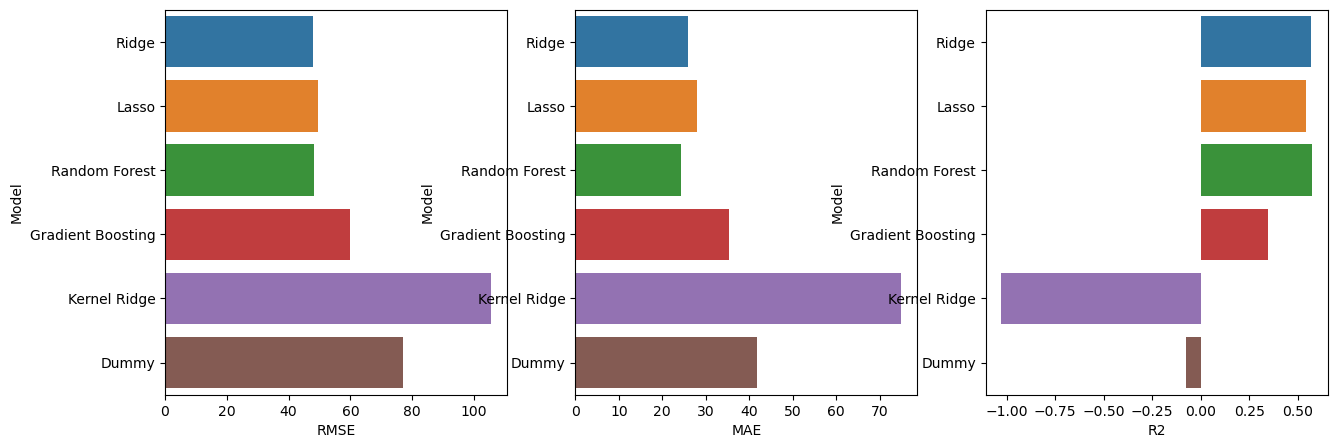

In [29]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonctions de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False),
           "MAE": make_scorer(mean_absolute_error),
           "R2": make_scorer(r2_score)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X, y)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "Params": clf.best_params_}

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques de comparaison des modèles
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=df_results, y=df_results.index, x="RMSE", ax=axs[0])
sns.barplot(data=df_results, y=df_results.index, x="MAE", ax=axs[1])
sns.barplot(data=df_results, y=df_results.index, x="R2", ax=axs[2])
plt.savefig('synthese_modèles.png')

<b><font size="3">Remarque </font></b> : Nous constatons que les modèles non linéaires améliorent la performance des modèles linéaires et le meilleur modèle est <b>Random Forest Regressor</b> 

### 2.4. Feature importance sans "ENERGYSTARScore"

- Feature importance globale

In [25]:
# Le meilheure model de l'ensemble des modèles utilisés
best_model

RandomForestRegressor(min_samples_leaf=2, n_estimators=150)

In [26]:
# Calcule l'importance de chaque feature (variable) dans le modèle de régression Random Forest
importances = best_model.feature_importances_

In [27]:
# Récupérer les noms de chaque colonne (feature) 
feature_names = X.columns

In [28]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

Une représentation graphique de l'importance des différentes variables

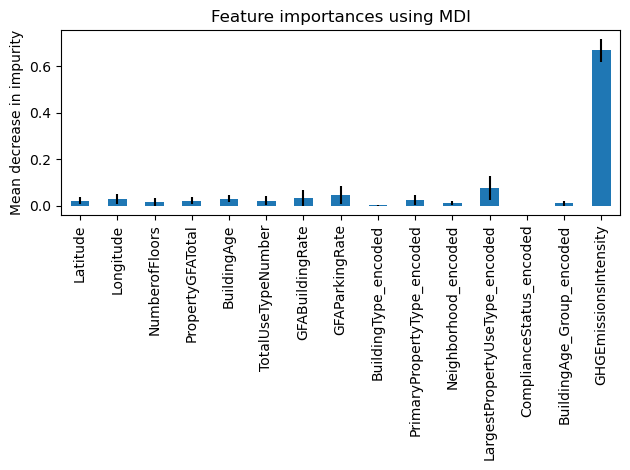

In [29]:
# créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('FI_G.png')

- Feature importance locale

In [40]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


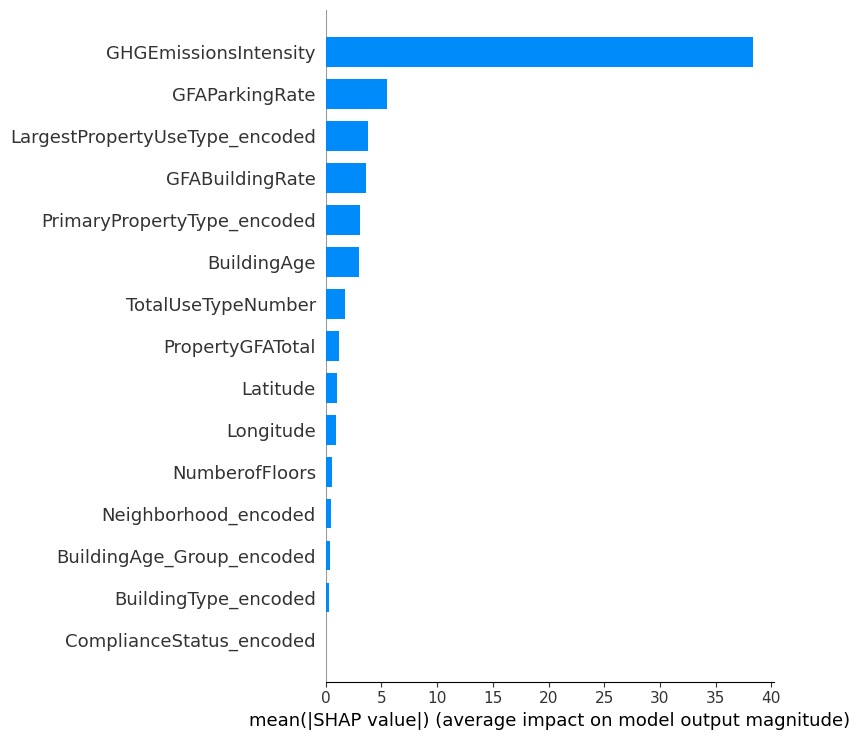

<Figure size 640x480 with 0 Axes>

In [30]:
# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Affichage des sommaires SHAP pour chaque caractéristique
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.savefig('FI_L.png')

In [31]:
# load JS visualization code to notebook
shap.initjs()

L'initialisation de la bibliothèque JavaScript SHAP est nécessaire pour pouvoir afficher les graphiques dans un notebook Jupyter.

In [32]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], feature_names=X_test.columns, show=False, matplotlib=True).savefig('FI_L_1.png')

Nous avons ci-dessus le diagramme de dispersion SHAP pour une observation donnée (ici l'observation 4), en utilisant la bibliothèque SHAP. Les entités poussant la prédiction vers le haut sont affichées en rouge, celles poussant la prédiction vers le bas sont en bleu.

## 3. Prédictions des modèles avec " ENERGYSTARScore "

- Réintroduction de de la variable "ENERGYSTARScore" dans le dataset

In [37]:
# Le dataset avec la variable "ENERGY STAR Score"
columns = ['Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'TotalUseTypeNumber', 'GFABuildingRate', 
           'GFAParkingRate', 'BuildingType_encoded', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded', 'LargestPropertyUseType_encoded', 
           'ComplianceStatus_encoded','BuildingAge_Group_encoded', 'ENERGYSTARScore', 'GHGEmissionsIntensity', 'SiteEUIWN(kBtu/sf)']
df_with_score = building_df_cleaned[columns]
df_with_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,60.0,2.83,84.300003
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,61.0,2.86,97.900002
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,43.0,2.19,97.699997
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,56.0,4.67,113.300003
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,75.0,2.88,118.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,26,1,1.00,0.00,2,9,9,24,0,2,46.0,1.70,76.699997
1647,47.59625,-122.32283,1,16000,12,1,1.00,0.00,2,10,6,31,0,1,NaN,2.01,65.900002
1648,47.63644,-122.35784,1,13157,42,3,1.00,0.00,2,10,11,31,0,4,NaN,16.99,460.100006
1649,47.52832,-122.32431,1,14101,27,5,1.00,0.00,2,8,9,31,0,2,NaN,1.57,55.500000


- Construisons un sous-ensemble du dataset avec les bâtiments ayant une valeur de l’EnergyStarScore non nulle

In [38]:
# Créer le dataset basé sur les bâtiments ayant une valeur de l’EnergyStarScore non nulle
df_with_score = df_with_score.dropna(subset='ENERGYSTARScore')
df_with_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,60.0,2.83,84.300003
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,61.0,2.86,97.900002
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,43.0,2.19,97.699997
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,56.0,4.67,113.300003
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,75.0,2.88,118.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,47.53161,-122.29944,2,24990,87,1,1.00,0.00,1,17,9,24,0,8,9.0,5.39,189.300003
1632,47.58831,-122.30650,3,45000,1,2,1.00,0.00,1,3,9,14,0,0,77.0,0.21,30.600000
1641,47.63572,-122.37525,1,13661,64,1,1.00,0.00,2,9,11,24,0,6,75.0,0.26,40.900002
1644,47.56440,-122.27813,1,15398,56,1,1.00,0.00,2,9,17,24,0,5,93.0,0.51,26.900000


### 3.1. Modèles linéaires

In [39]:
# Créer des objets X et y qui séparent les variables d'entrée (X) de la variable cible (y) dans le cadre de la modélisation prédictive.
X = df_with_score.drop(columns = 'SiteEUIWN(kBtu/sf)')
y = df_with_score['SiteEUIWN(kBtu/sf)']

In [40]:
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)

On sépare ensuite le jeu de données en données d'entraînement et données test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.3, random_state = 42)

In [42]:
X_train.shape

(758, 16)

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

Meilleurs paramètres : {'quantile': 0.25, 'strategy': 'mean'}
RMSE : 66.04196772886294
R2 : -0.0034956507517540647
MAE : 36.373187528094235


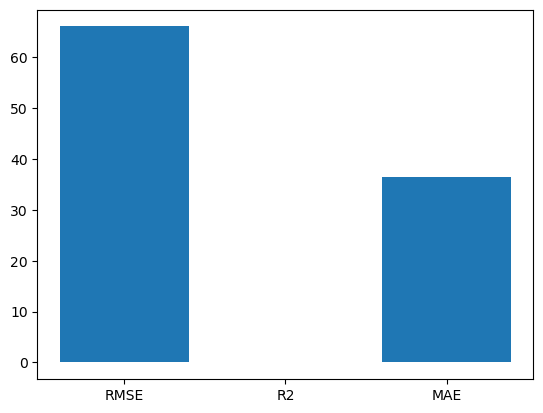

In [17]:
# Définition des paramètres à tester
param_grid = {'strategy': ['mean', 'median', 'quantile'], 'quantile': [0.25, 0.5, 0.75]}

# Création du modèle
dummy = DummyRegressor()

# Validation croisée
grid_search = GridSearchCV(dummy, param_grid=param_grid, cv=5, scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], refit='r2')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation avec les meilleurs paramètres
best_dummy = grid_search.best_estimator_
y_pred = best_dummy.predict(X_test)

# Calcul de la RMSE, du R2 et du MAE sur l'ensemble de validation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

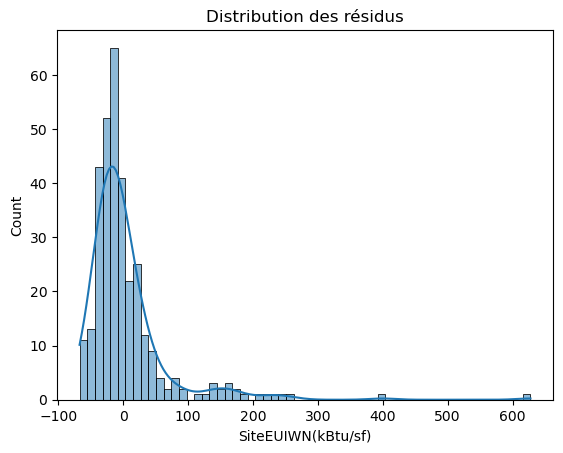

In [40]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

Meilleurs paramètres : {'alpha': 100}
RMSE : 50.06120533301735
R2 : 0.4233954179386413
MAE : 22.528895706916618


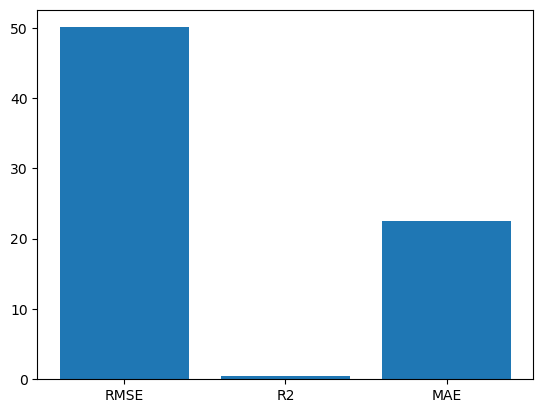

In [41]:
# Création du modèle Ridge
ridge_model = Ridge()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

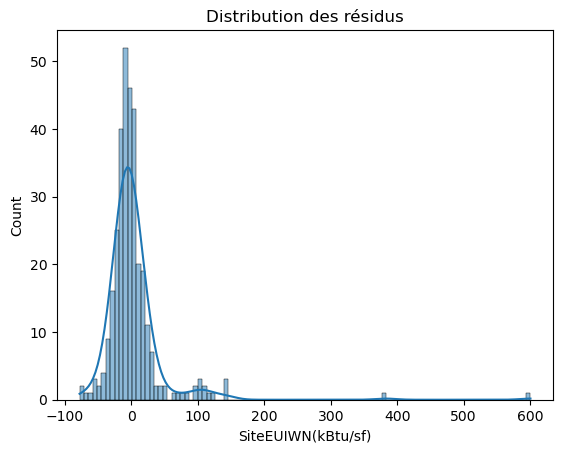

In [42]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

Meilleurs paramètres : {'alpha': 1}
RMSE : 49.18025738883498
R2 : 0.4435103647439017
MAE : 21.782266240996677


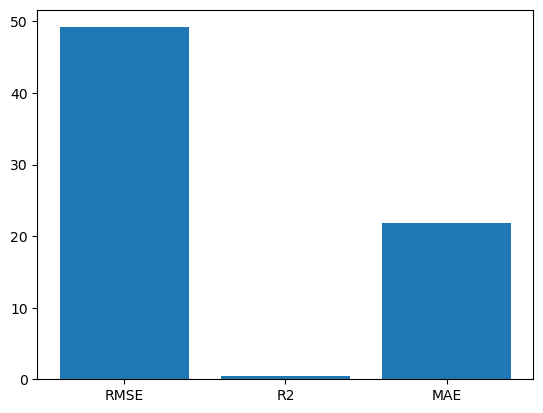

In [43]:
# Création du modèle Lasso
lasso_model = Lasso()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

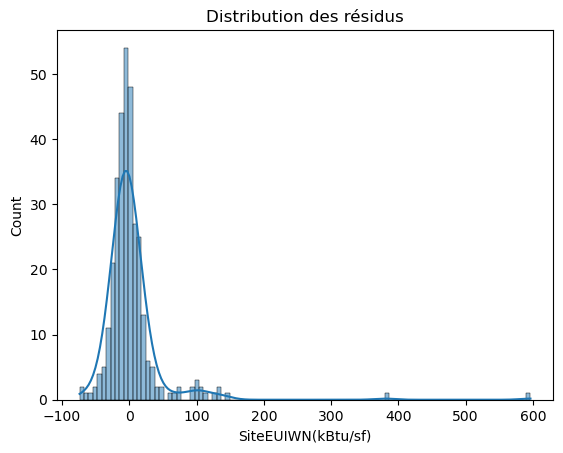

In [44]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- <b>Tableau recapitulatif des modèles linéaires</b> 

Testing Ridge...
RMSE: 50.82
R2: 0.45
MAE: 23.39

Testing Lasso...
RMSE: 52.54
R2: 0.40
MAE: 26.18

Testing Dummy...
RMSE: 68.33
R2: -0.06
MAE: 34.99

            RMSE        R2        MAE
Ridge  50.823225  0.447763  23.394994
Lasso  52.543701  0.402809  26.175775
Dummy  68.329142 -0.055592  34.991869


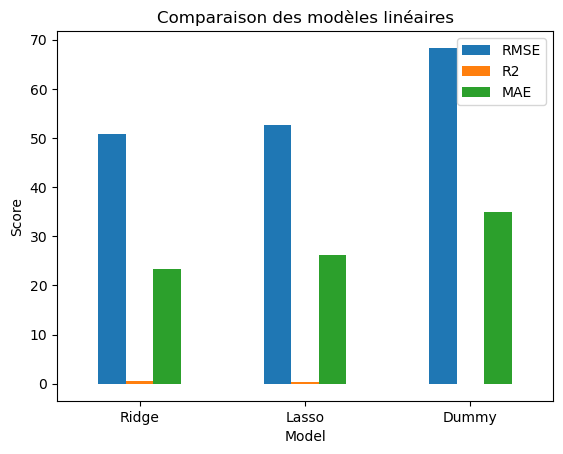

In [43]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    
    clf.fit(X_train, y_train)
    results[model[0]] = {
        "RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
        "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
        "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]
    }
    
    # Affichage des résultats
    print(f"RMSE: {results[model[0]]['RMSE']:.2f}")
    print(f"R2: {results[model[0]]['R2']:.2f}")
    print(f"MAE: {results[model[0]]['MAE']:.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")

# Affichage du tableau de résultats
print(df_results)

# Affichage graphique des résultats
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles linéaires")
plt.savefig('M_lineaires_score.png')
plt.show()

### 3.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

In [49]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)      

RMSE: 46.02
MAE: 19.84
R2: 0.53


<Figure size 600x600 with 0 Axes>

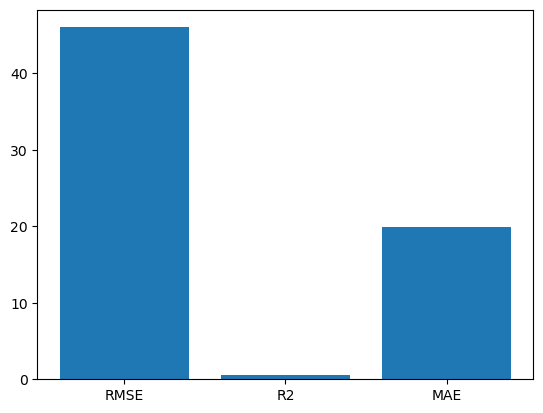

In [50]:
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer les métriques sur le jeu de test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# afficher les métriques
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R2: {:.2f}".format(r2))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

In [53]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 5
    else:
        sizes[(yt, yp)] = 5     
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

plt.plot([0, 300], [0, 270], "--", color="red")

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
#plt.xlim([2.9, 9.1])
#plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

- <span style="color: blue;">Random Forest Regressor</span> 

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestRegressor(min_samples_split=5)
RMSE: 21.36 
R2: 0.83 
MAE: 12.35 
Time: 61.79s


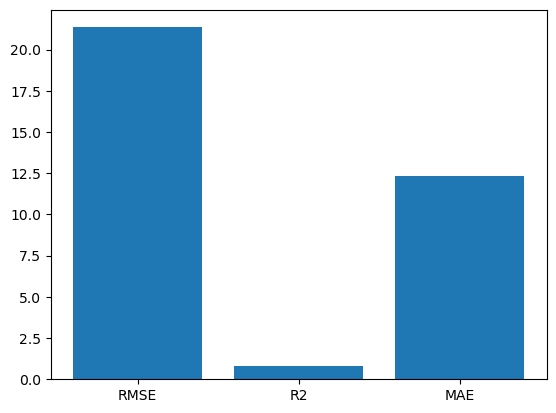

In [55]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle
rf = RandomForestRegressor()

start_time = timeit.default_timer()

# Faire une recherche de grille pour trouver les meilleurs hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calculer la RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer la R2
r2 = r2_score(y_test, y_pred)

# Calculer la MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: {:.2f} \nR2: {:.2f} \nMAE: {:.2f} \nTime: {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

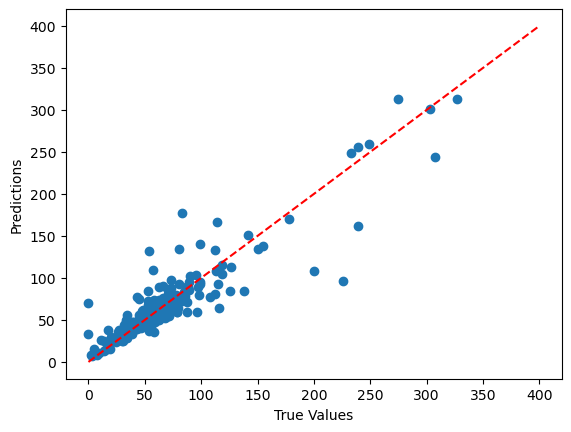

In [56]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.scatter(y_test, y_pred)
plt.plot([0, 400], [0, 400], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <span style="color: blue;">Gradient boosting</span> 

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Meilleur score :  1550.8618067867399
GradientBoostingRegressor()
RMSE 19.33, R2 0.86, MAE 11.78, time 37.68s


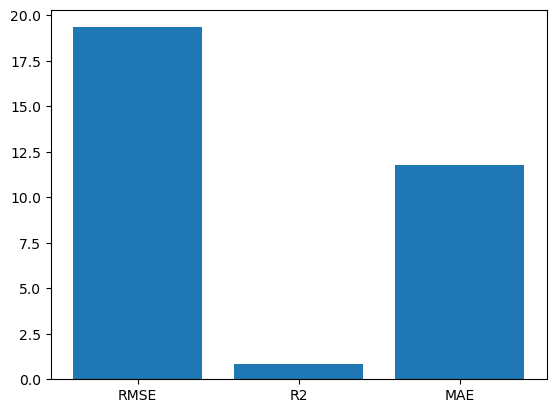

In [63]:
# Définition des paramètres à tester
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Instanciation du modèle
gb_reg = GradientBoostingRegressor()

start_time = timeit.default_timer()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(gb_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

# Entraînement du modèle avec les meilleurs paramètres
best_gb_reg = GradientBoostingRegressor(**grid_search.best_params_)
best_gb_reg.fit(X_train, y_train)

# Affichage du meilleur modèle
print(best_gb_reg)

# Prédiction sur les données de test
y_pred = best_gb_reg.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calcul des métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE {:.2f}, R2 {:.2f}, MAE {:.2f}, time {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

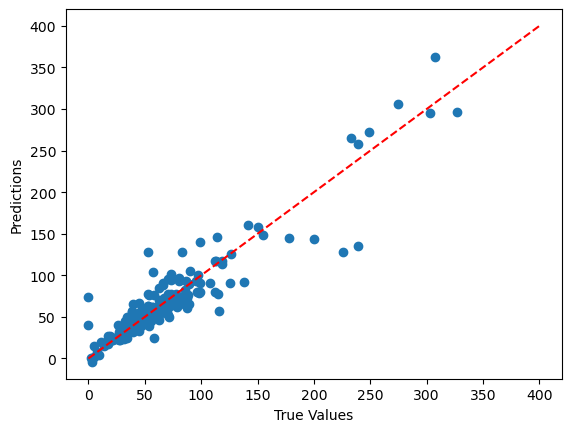

In [82]:
# Tracer la courbe des vraies valeurs et des prédictions
plt.scatter(y_test, y_pred)
plt.plot([0, 400], [0, 400], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <b>Tableau recapitulatif des modèles non-linéaires</b> 

Testing Random Forest...
Random Forest RMSE: 42.35
Random Forest R2: 0.59
Random Forest MAE: 19.50

Testing Gradient Boosting...
Gradient Boosting RMSE: 54.69
Gradient Boosting R2: 0.31
Gradient Boosting MAE: 28.28

Testing Kernel Ridge...
Kernel Ridge RMSE: 86.71
Kernel Ridge R2: -0.73
Kernel Ridge MAE: 71.24

                        RMSE        R2        MAE
Model                                            
Random Forest      43.128547  0.600112  19.082128
Gradient Boosting  55.379977  0.325120  30.175131
Kernel Ridge       85.892485 -0.788800  69.686516


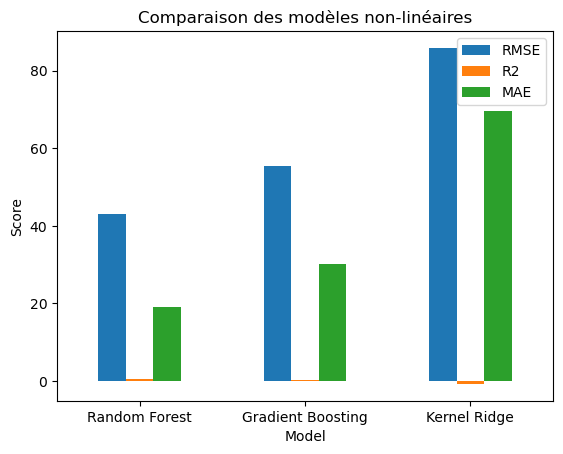

In [44]:
# Liste des modèles à tester
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False), 
           "R2": make_scorer(r2_score),
           "MAE": make_scorer(mean_absolute_error)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]}
    
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)

    # Affichage des résultats sur les données de test
    print(f"{model[0]} RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"{model[0]} R2: {r2_score(y_test, y_pred):.2f}")
    print(f"{model[0]} MAE: {mean_absolute_error(y_test, y_pred):.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles non-linéaires")
plt.savefig('M_N_lineaires_score.png')
plt.show()

### 3.3. Tableau récapitulatif de l'ensemble des modèles

Testing Ridge...
Testing Lasso...
Testing Random Forest...
Testing Gradient Boosting...
Testing Kernel Ridge...
Testing Dummy...
                        RMSE        MAE        R2  \
Model                                               
Ridge              50.823225  23.394994  0.447763   
Lasso              52.543701  26.175775  0.402809   
Random Forest      43.470215  19.128892  0.586706   
Gradient Boosting  55.383829  30.184801  0.325020   
Kernel Ridge       85.892485  69.686516 -0.788800   
Dummy              68.329142  34.991869 -0.055592   

                                                              Params  
Model                                                                 
Ridge                                                 {'alpha': 0.1}  
Lasso                                                  {'alpha': 10}  
Random Forest                   {'max_depth': 5, 'n_estimators': 50}  
Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Kernel Ridge        

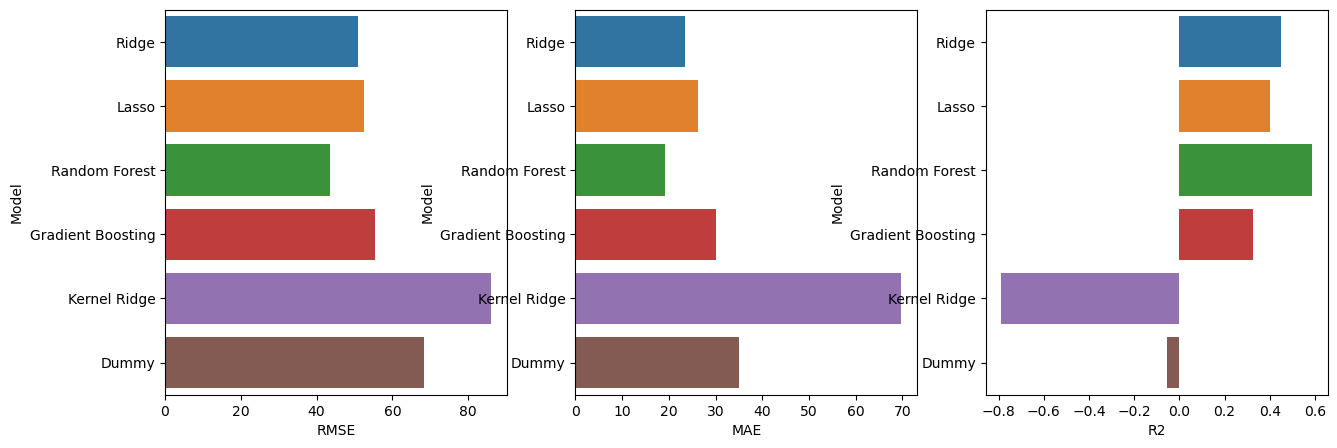

In [23]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonctions de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False),
           "MAE": make_scorer(mean_absolute_error),
           "R2": make_scorer(r2_score)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "Params": clf.best_params_}

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques de comparaison des modèles
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=df_results, y=df_results.index, x="RMSE", ax=axs[0])
sns.barplot(data=df_results, y=df_results.index, x="MAE", ax=axs[1])
sns.barplot(data=df_results, y=df_results.index, x="R2", ax=axs[2])
plt.savefig('synthese_modèles_score.png')

### 3.4. Feature importance avec 'ENERGYSTARScore'

- <b>Feature importance globale</b> 

In [78]:
# Le meilheure model de l'ensemble des modèles utilisés
best_model

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [79]:
# Calcule l'importance de chaque feature (variable) dans le modèle de régression Random Forest
importances = best_model.feature_importances_

In [80]:
# Récupérer les noms de chaque colonne (feature) 
feature_names = X.columns

In [81]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

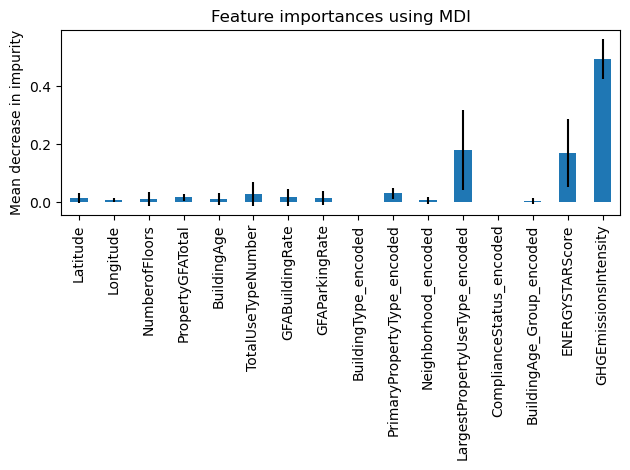

In [82]:
# créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('FI_G_score.png')

- <b>Feature importance locale</b> 

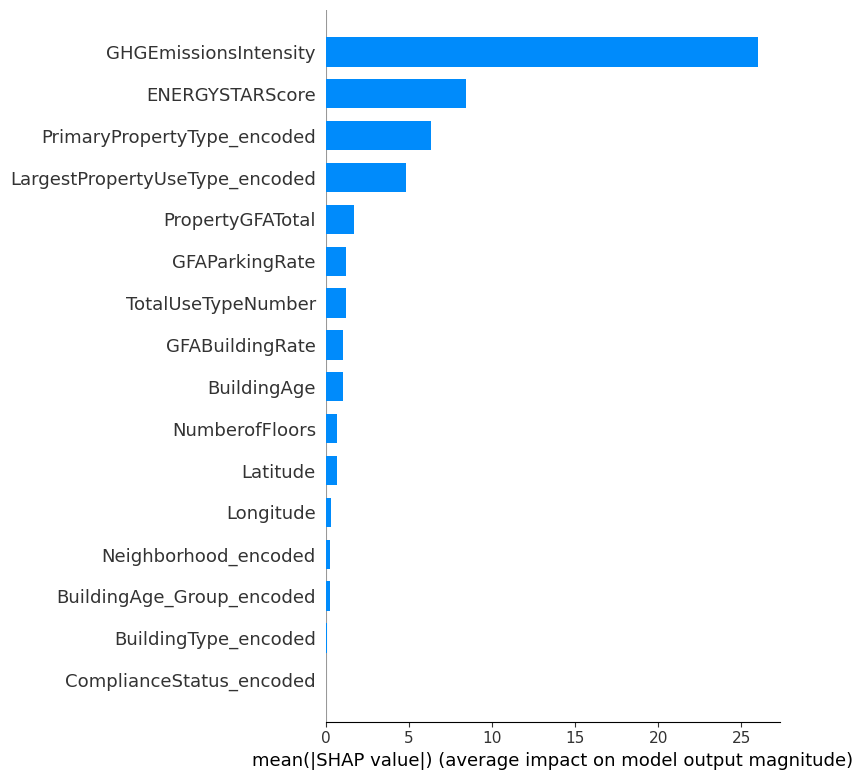

In [131]:
# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Affichage des sommaires SHAP pour chaque caractéristique
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.savefig('FI_L_score.png')

In [84]:
# load JS visualization code to notebook
shap.initjs()

L'initialisation de la bibliothèque JavaScript SHAP est nécessaire pour pouvoir afficher les graphiques dans un notebook Jupyter.

In [126]:
i = 1
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], feature_names=X_test.columns, show=False, matplotlib=True).savefig('FI_L_1_score.png')

Nous avons ci-dessus le diagramme de dispersion SHAP pour une observation donnée (ici l'observation 1), en utilisant la bibliothèque SHAP. Les variables poussant la prédiction vers le haut sont affichées en rouge, celles poussant la prédiction vers le bas sont en bleu.

## 4. Conclusion

Pour les prédictions de la consommation totale d’énergie de bâtiments non destinés à l’habitation, nous pouvons affirmer que les modèles non linéaires sont plus performantes que les modèles linéaires. Le meilleur modèle choisi est <b>Random Forest Regressor</b> qui nous offre les meilleurs performances. Aussi, nous avons constaté que <b>"ENERGY STAR Score"</b> améliore fortement la performance des modèles.